In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\train.csv')

# Subs

In [7]:
min_subscribers = df['num_sub'].min()
max_subscribers = df['num_sub'].max()
df['subscribers_scaled'] = (df['num_sub'] - min_subscribers) / (max_subscribers - min_subscribers)

In [9]:
print(df['subscribers_scaled'])
print(df['subscribers_scaled'].min())
print(df['subscribers_scaled'].max())

0       0.003155
1       0.001314
2       0.005397
3       0.041841
4       0.000607
          ...   
4319    0.000033
4320    0.003908
4321    0.000053
4322    0.000138
4323    0.078243
Name: subscribers_scaled, Length: 4324, dtype: float64
0.0
1.0


In [10]:
mean_subscribers = df['num_sub'].mean()
std_subscribers = df['num_sub'].std()
df['subscribers_normalized'] = (df['num_sub'] - mean_subscribers) / std_subscribers

In [11]:
print(df['subscribers_normalized'])
print(df['subscribers_normalized'].min())
print(df['subscribers_normalized'].max())

0      -0.317590
1      -0.346109
2      -0.282848
3       0.281706
4      -0.357064
          ...   
4319   -0.365946
4320   -0.305923
4321   -0.365632
4322   -0.364317
4323    0.845612
Name: subscribers_normalized, Length: 4324, dtype: float64
-0.36645989108254906
15.124755722102597


In [12]:
import seaborn as sns

<AxesSubplot: xlabel='subscribers_normalized', ylabel='Count'>

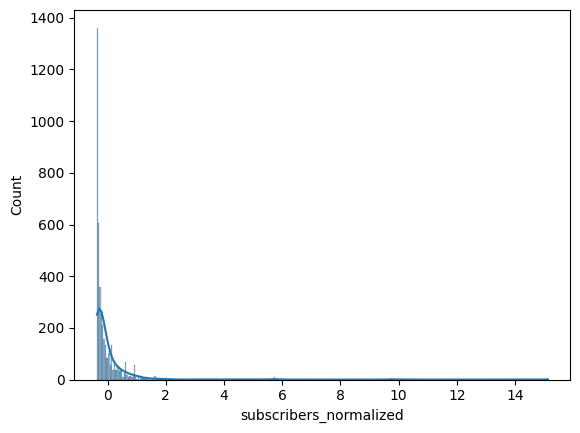

In [20]:
sns.histplot(df['subscribers_normalized'], kde=True)

<AxesSubplot: ylabel='subscribers_normalized'>

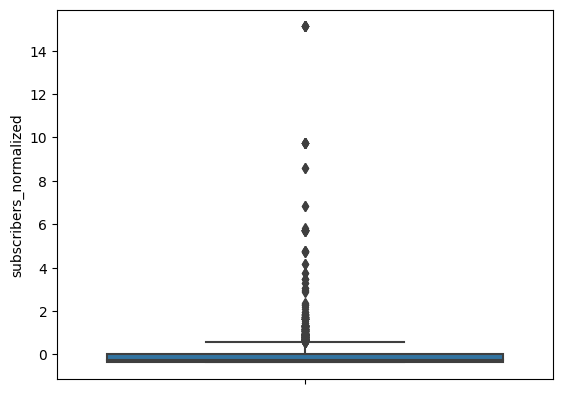

In [21]:
sns.boxplot(y=df['subscribers_normalized'])

<AxesSubplot: ylabel='subscribers_scaled'>

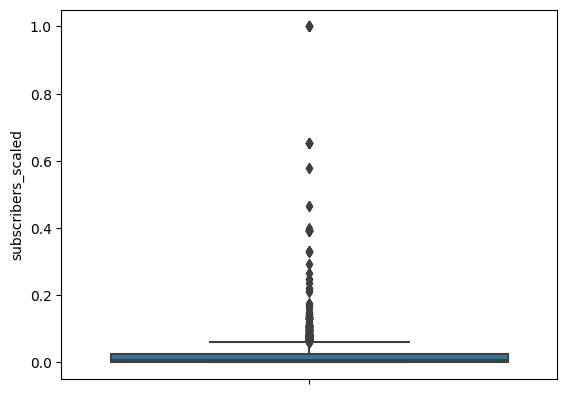

In [22]:
sns.boxplot(y=df['subscribers_scaled'])

<AxesSubplot: xlabel='subscribers_scaled', ylabel='Count'>

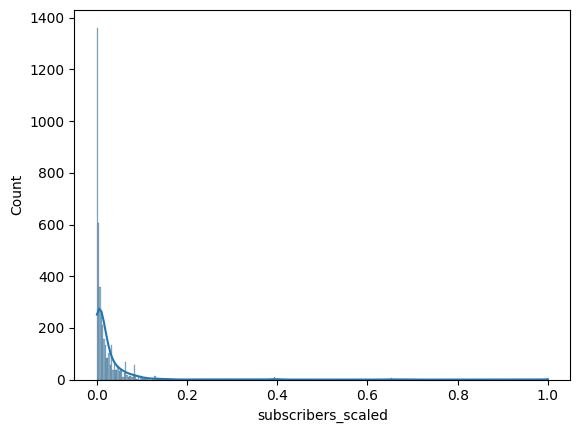

In [23]:
sns.histplot(df['subscribers_scaled'], kde=True)

In [25]:
import numpy as np

In [26]:
df['subscribers_log'] = np.log(df['subscribers_normalized'] + 1)

In [27]:
print(df['subscribers_log'])
print(df['subscribers_log'].min())
print(df['subscribers_log'].max())

0      -0.382125
1      -0.424815
2      -0.332468
3       0.248192
4      -0.441709
          ...   
4319   -0.455621
4320   -0.365172
4321   -0.455127
4322   -0.453055
4323    0.612811
Name: subscribers_log, Length: 4324, dtype: float64
-0.4564319680168511
2.7803557135501955


<AxesSubplot: ylabel='subscribers_log'>

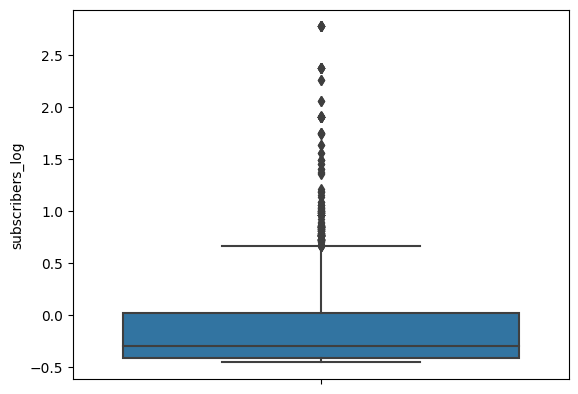

In [28]:
sns.boxplot(y=df['subscribers_log'])

<AxesSubplot: xlabel='subscribers_log', ylabel='Count'>

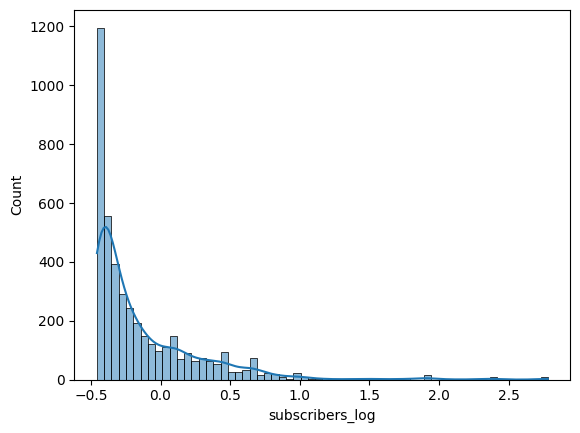

In [29]:
sns.histplot(df['subscribers_log'], kde=True)

In [30]:
from scipy import stats
df['subscribers_boxcox'], lambda_ = stats.boxcox(df['subscribers_normalized'] + 1)


In [31]:
print(df['subscribers_boxcox'])
print(df['subscribers_boxcox'].min())
print(df['subscribers_boxcox'].max())

0      -0.602166
1      -0.706916
2      -0.492198
3       0.190738
4      -0.751194
          ...   
4319   -0.788926
4320   -0.563251
4321   -0.787564
4322   -0.781876
4323    0.334587
Name: subscribers_boxcox, Length: 4324, dtype: float64
-0.7911607379125527
0.4487597392365979


<AxesSubplot: ylabel='subscribers_boxcox'>

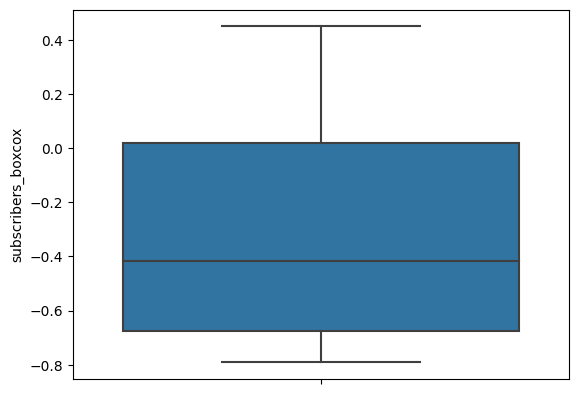

In [32]:
sns.boxplot(y=df['subscribers_boxcox'])

<AxesSubplot: xlabel='subscribers_boxcox', ylabel='Count'>

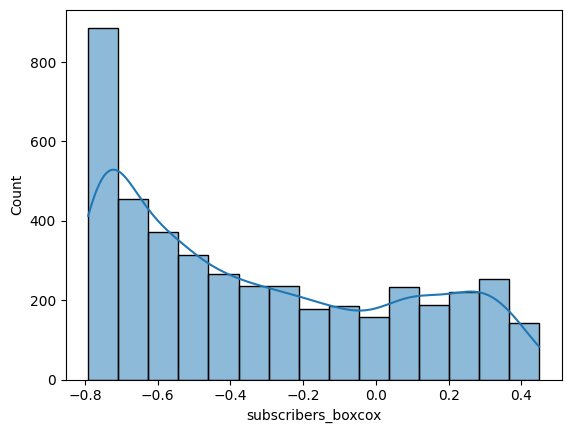

In [33]:
sns.histplot(df['subscribers_boxcox'], kde=True)

In [34]:
df['subscribers_arcsinh'] = np.arcsinh(df['subscribers_normalized'])
print(df['subscribers_arcsinh'])
print(df['subscribers_arcsinh'].min())
print(df['subscribers_arcsinh'].max())

0      -0.312480
1      -0.339547
2      -0.279206
3       0.278107
4      -0.349881
          ...   
4319   -0.358235
4320   -0.301342
4321   -0.357940
4322   -0.356704
4323    0.767891
Name: subscribers_arcsinh, Length: 4324, dtype: float64
-0.3587170794886083
3.410571103404817


<AxesSubplot: ylabel='subscribers_arcsinh'>

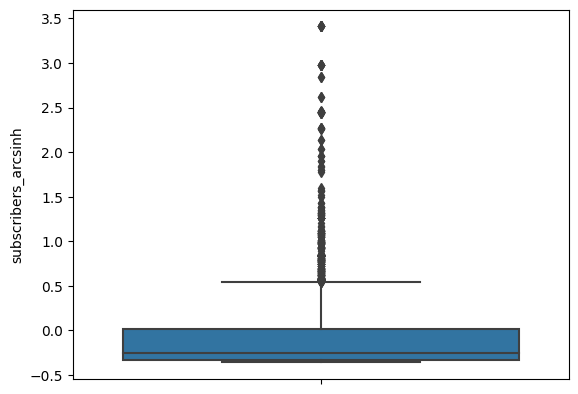

In [35]:
sns.boxplot(y=df['subscribers_arcsinh'])

<AxesSubplot: xlabel='subscribers_arcsinh', ylabel='Count'>

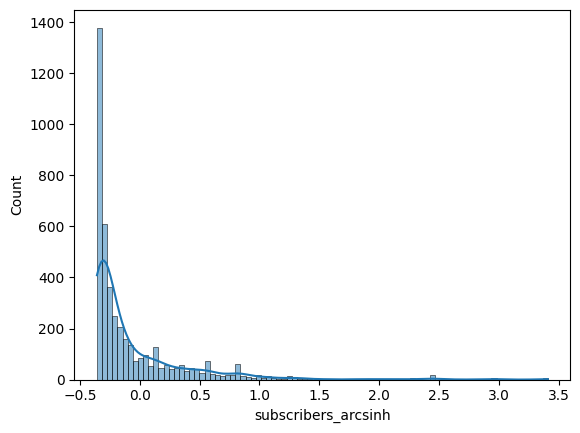

In [36]:
sns.histplot(df['subscribers_arcsinh'], kde=True)

In [37]:
df['subscribers_sigmoid'] = 1 / (1 + np.exp(-df['subscribers_normalized']))
print(df['subscribers_sigmoid'])
print(df['subscribers_sigmoid'].min())
print(df['subscribers_sigmoid'].max())

0       0.421263
1       0.414326
2       0.429756
3       0.569964
4       0.411671
          ...   
4319    0.409521
4320    0.424110
4321    0.409597
4322    0.409915
4323    0.699646
Name: subscribers_sigmoid, Length: 4324, dtype: float64
0.40939671284672335
0.9999997299762698


<AxesSubplot: ylabel='subscribers_sigmoid'>

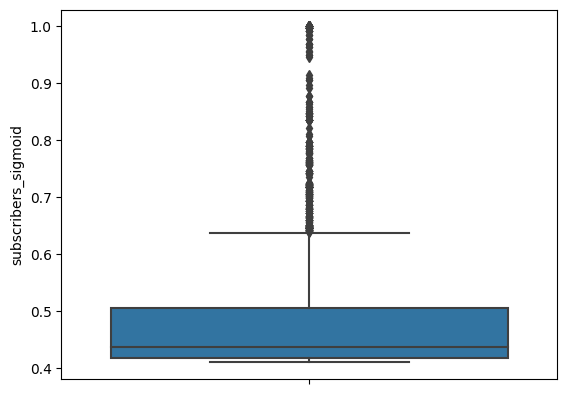

In [38]:
sns.boxplot(y=df['subscribers_sigmoid'])

<AxesSubplot: xlabel='subscribers_sigmoid', ylabel='Count'>

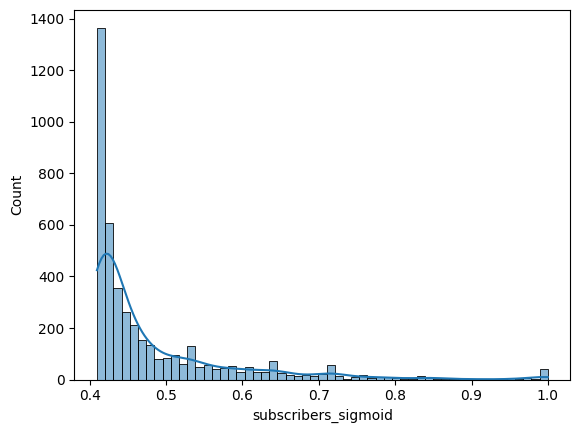

In [39]:

sns.histplot(df['subscribers_sigmoid'], kde=True)

<AxesSubplot: xlabel='num_sub', ylabel='Count'>

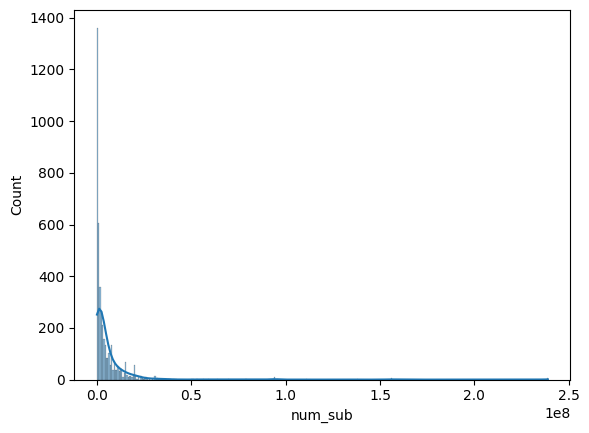

In [41]:
sns.histplot(df['num_sub'], kde=True)

count    4.324000e+03
mean     5.653811e+06
std      1.542810e+07
min      3.200000e+01
25%      4.427500e+05
50%      1.700000e+06
75%      5.950000e+06
max      2.390000e+08
Name: num_sub, dtype: float64

# Lang

In [56]:
import string
import re
import nltk
nltk.data.path.append('C:/Users/cheek/ML-7641-Team14/shravan/nltk_data')
stopwords = nltk.corpus.stopwords.words('english')

In [73]:
# def clean_text(text):
#     text = re.sub(f"[{string.punctuation}]", "", text)
#     text = text.lower()
#     words = nltk.word_tokenize(text)
#     print(words)
#     filtered = []
#     for word in words:
#         if word not in stopwords:
#             filtered.append(word)
#     print(filtered)
#     text = ' '.join(filtered)
#     return text

In [103]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    filtered = []
    for word in words:
        if word not in stopwords:
            filtered.append(word)
    return ' '.join(filtered)
    #return pad_sequences([filtered], 100)[0]

In [104]:
def pad_sequences(sentences, max_length, padding_token='<PAD>', null_token='<NULL>'):
    padded_sentences = []
    for sentence in sentences:
        # Replace null values with the null_token
        if sentence is None or len(sentence) == 0:
            padded_sentence = [null_token] * max_length
        else:
            # Truncate or pad the sentence to the max_length
            if len(sentence) > max_length:
                padded_sentence = sentence[:max_length]
            else:
                padded_sentence = sentence + [padding_token] * (max_length - len(sentence))

        padded_sentences.append(padded_sentence)

    return padded_sentences[0]

In [106]:
ddf['tokens'].apply(lambda x: print(x))

['sentence', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
['another', 'sentence', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', 

0    None
1    None
2    None
Name: tokens, dtype: object

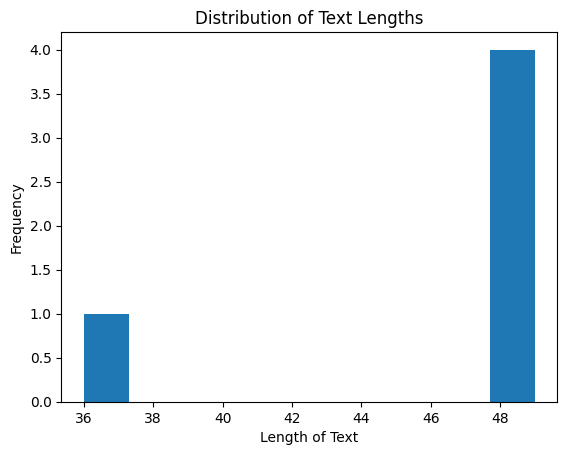

In [109]:
import matplotlib.pyplot as plt

# create example DataFrame with 'lang' column
data = {'lang': ['Power Book II: Ghost | Official Trailer | Seas...',
                 'Julian Newman WENT OFF Against Tristan Jass an...',
                 'GET REO GO TO LES DO MAKEUP\'S AND...',
                 'Binging with Babish: Tater Tots from Breaking ...',
                 'My Friend sister Birthday Cake doll cake kaise...']}
df = pd.DataFrame(data)

# apply the len function to each element in the 'lang' column using apply() function
lengths = df['lang'].apply(len)

# plot the resulting histogram using matplotlib
plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [108]:
from gensim.models import Word2Vec

In [110]:
tokenized_data = df['lang'].tolist()

# Training Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
model.save("word2vec_model.model")

In [111]:
def get_text_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

# Apply the function to your DataFrame
df['text_embeddings'] = df['lang'].apply(lambda x: get_text_embedding(x, model))

In [114]:
df['text_embeddings'].apply(lambda x: print(x))

[-4.7362296e-04  2.3044061e-03  7.3778396e-04  7.2404154e-04
 -1.0636320e-03 -1.9627041e-03  2.6604482e-03  3.6641301e-03
 -2.2138963e-03 -2.3736933e-03  2.1027676e-03 -1.6264664e-03
  2.9489482e-04  7.9313118e-04 -7.8360969e-04 -7.1381533e-04
  4.2924872e-03 -3.9606679e-05 -2.6399950e-03 -4.8363325e-03
  8.8201050e-04 -2.0780928e-04  4.1207392e-03  1.1398073e-04
 -1.5540265e-04 -2.4246550e-04 -1.4469976e-03  6.5165112e-04
 -8.9826790e-04  8.5425930e-04  1.6891987e-03 -1.0602106e-03
  1.6017883e-03 -3.0736050e-03 -5.3389027e-04  9.4702438e-04
  2.6149321e-03 -4.1252130e-04 -3.6859437e-04 -9.6605573e-04
 -8.7891816e-04 -4.8506932e-04 -1.7111480e-03 -2.1973686e-04
 -6.8019603e-05 -5.4041197e-04 -1.6143569e-03  4.0858362e-05
  1.2909823e-04  1.7946434e-03 -4.8960076e-04 -8.9381938e-04
 -2.6189368e-03 -4.2813522e-04 -1.0551005e-04 -1.8422629e-03
  2.0484682e-03 -1.4838843e-03 -1.2879312e-03  1.4389401e-03
 -9.9597755e-04 -2.0819400e-03  2.4716405e-03 -7.9193164e-04
 -1.8652399e-03  2.39896

0    None
1    None
2    None
3    None
4    None
Name: text_embeddings, dtype: object

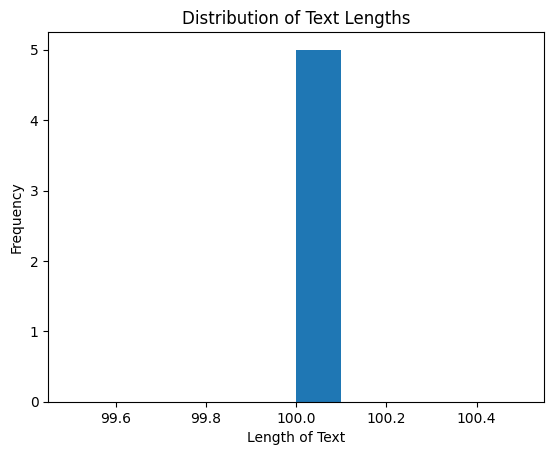

In [116]:
lengths = df['text_embeddings'].apply(len)

# plot the resulting histogram using matplotlib
plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()